In [17]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [18]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge([r,g,b]) # merge in rgb order to display with matplotlib

In [19]:
# mean square error
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    return err

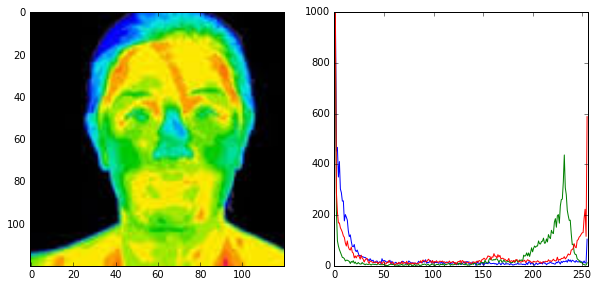

In [20]:
img_original = cv2.imread('../colorImages/face_thermogram.jpg')
img = cv2.imread('../colorImages/face_thermogram_4.jpg')

plt.figure(figsize=(10,10)) 

plt.subplot(221)
plt.imshow(invertChannels(img_original))


plt.subplot(222)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_original],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256]) 
    plt.ylim([0,1000])

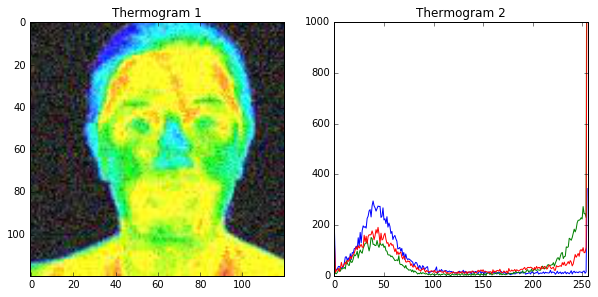

In [21]:
plt.figure(figsize=(10,10)) 
plt.subplot(223)
plt.imshow(invertChannels(img))
plt.title('Thermogram 1')

plt.subplot(224)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    
    plt.ylim([0,1000])
plt.title('Thermogram 2')    

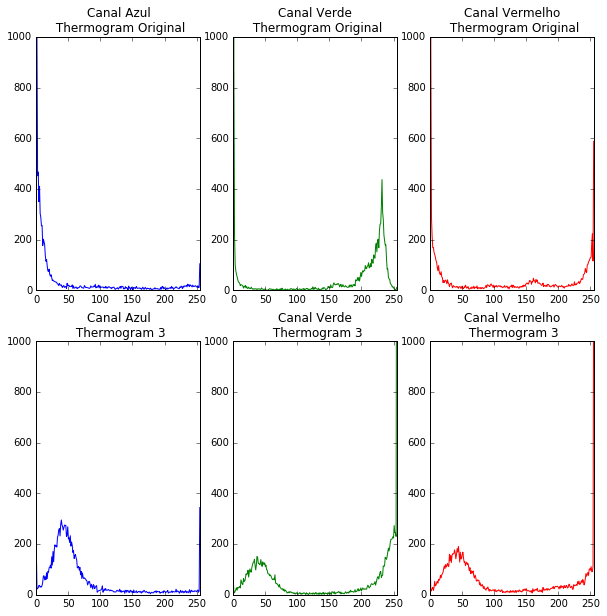

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(231)
histr = cv2.calcHist([img_original],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256]) 
plt.ylim([0,1000])
plt.title('Canal Azul\n Thermogram Original')   

plt.subplot(232)
histr = cv2.calcHist([img_original],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Verde\n Thermogram Original')  

plt.subplot(233)
histr = cv2.calcHist([img_original],[2],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Vermelho\n Thermogram Original')  

plt.subplot(234)
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256]) 
plt.ylim([0,1000])
plt.title('Canal Azul\n Thermogram 3')   

plt.subplot(235)
histr = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Verde\n Thermogram 3')  

plt.subplot(236)
histr = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Vermelho\n Thermogram 3')  

# Problema: Presença de ruido gaussiano

In [31]:
# Filtered with gaussian filter
#b,g,r = cv2.split(img)
print "Starting Error %s"  % mse(img_original,img)
for i in np.arange(0,100,2):
    for ksize in [3,5,7,9]:
        img_enhanced = cv2.GaussianBlur(img,(ksize,ksize),i)
        print "Sigma: %s, Ksize: %s, MSE: %s" %(i, ksize, mse(img_original,img_enhanced))

Starting Error 4546.74756944
Sigma: 0, Ksize: 3, MSE: 4147.85944444
Sigma: 0, Ksize: 5, MSE: 4227.74381944
Sigma: 0, Ksize: 7, MSE: 4428.055625
Sigma: 0, Ksize: 9, MSE: 4753.43631944
Sigma: 2, Ksize: 3, MSE: 4318.27791667
Sigma: 2, Ksize: 5, MSE: 4420.20930556
Sigma: 2, Ksize: 7, MSE: 4793.60333333
Sigma: 2, Ksize: 9, MSE: 4807.75979167
Sigma: 4, Ksize: 3, MSE: 4065.63944444
Sigma: 4, Ksize: 5, MSE: 4510.19069444
Sigma: 4, Ksize: 7, MSE: 4841.46958333
Sigma: 4, Ksize: 9, MSE: 5202.80729167
Sigma: 6, Ksize: 3, MSE: 4195.11486111
Sigma: 6, Ksize: 5, MSE: 4657.86208333
Sigma: 6, Ksize: 7, MSE: 5156.55208333
Sigma: 6, Ksize: 9, MSE: 5456.423125
Sigma: 8, Ksize: 3, MSE: 4195.11486111
Sigma: 8, Ksize: 5, MSE: 4530.62236111
Sigma: 8, Ksize: 7, MSE: 5055.45395833
Sigma: 8, Ksize: 9, MSE: 5627.94972222
Sigma: 10, Ksize: 3, MSE: 4195.11486111
Sigma: 10, Ksize: 5, MSE: 4538.76458333
Sigma: 10, Ksize: 7, MSE: 5202.9
Sigma: 10, Ksize: 9, MSE: 5552.25111111
Sigma: 12, Ksize: 3, MSE: 4195.11486111
Si

In [35]:
# Filtered with averaging filter
#b,g,r = cv2.split(img)
print "Starting Error %s"  % mse(img_original,img)
for ksize in [3,5,7,9]:
    kernel = np.ones((ksize,ksize),np.float32)/(ksize * ksize)
    img_enhanced = cv2.filter2D(img,-1,kernel)        
    print "Ksize: %s, MSE: %s" %(ksize, mse(img_original,img_enhanced))    

Starting Error 4546.74756944
Ksize: 3, MSE: 4196.47284722
Ksize: 5, MSE: 4542.35055556
Ksize: 7, MSE: 5087.33027778
Ksize: 9, MSE: 5717.10513889


In [34]:
# Filtered with median filter
#b,g,r = cv2.split(img)
print "Starting Error %s"  % mse(img_original,img)
for ksize in [3,5,7,9]:
    img_enhanced = cv2.medianBlur(img,ksize)         
    print "Ksize: %s, MSE: %s" %(ksize, mse(img_original,img_enhanced))   

Starting Error 4546.74756944
Ksize: 3, MSE: 4209.031875
Ksize: 5, MSE: 4298.56152778
Ksize: 7, MSE: 4527.48319444
Ksize: 9, MSE: 4826.72965278


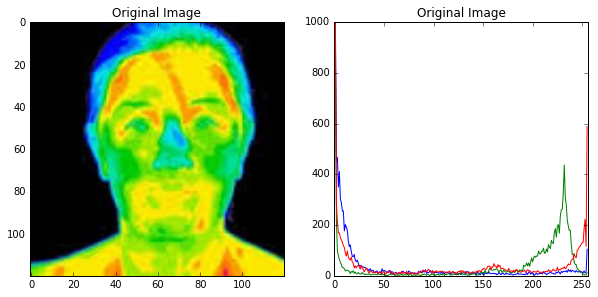

In [36]:
plt.figure(figsize=(10,10)) 

img_enhanced = cv2.GaussianBlur(img,(3,3),4)

plt.subplot(221)
plt.imshow(invertChannels(img_original))
plt.title('Original Image')

plt.subplot(222)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_original],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256]) 
    plt.ylim([0,1000])
plt.title('Original Image')


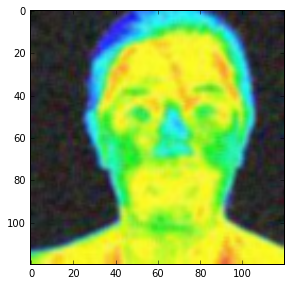

In [37]:
plt.figure(figsize=(10,10)) 
plt.subplot(223)
plt.imshow(invertChannels(img_enhanced))

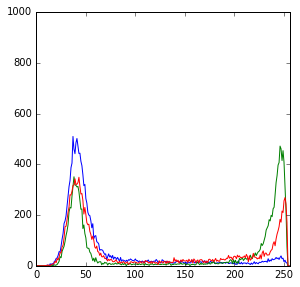

In [38]:
plt.figure(figsize=(10,10)) 

plt.subplot(224)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_enhanced],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    
    plt.ylim([0,1000])


In [40]:
print "Sigma: %s, Ksize: %s, MSE: %s" %(4, 3, mse(img_original,img_enhanced))

Sigma: 4, Ksize: 3, MSE: 4065.63944444
